## Data Pipeline

데이터 파이프 라인은 데이터에서 유의미한 결과를 도출하기 위한 핵심 프로세스이다.  
데이터 수집, 스크럽, 탐색, 모델링, 해석 이렇게 5가지(OSEMN)로 이루어져 있다.  
수집 단계에서는 단일 / 여러 소스에서 실제 데이터를 수집한다. 스크럽 단계는 데이터를 정리하고 이상치와 같은 데이터의 전처리를 수행한다. 탐색 단계는 변수간의 상관관계를 찾고, 모델링 단계는 실제 머신 러닝 모델을 구축, 해석 단계는 해석과 결과를 결합하여 결론을 도출한다.

필요한 module import 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 

#### Obtaining Data (데이터 수집)
customer data 불러옴 

In [3]:
data = pd.read_csv('data/customer_churn_sample_data.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 12)

#### Scrubbing the Data (데이터 스크럽)
null 데이터 확인 후 제거 

In [5]:
data.isnull().values.any()

True

In [6]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [7]:
data[['EstimatedSalary', 'Age']].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [8]:
data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [10]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [11]:
round(data.isnull().sum()/len(data)*100, 2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [12]:
data[['Gender', 'Age', 'EstimatedSalary']].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [13]:
mean_value = data['EstimatedSalary'].mean()
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)

In [14]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].value_counts().idxmax())

In [16]:
data['Age'].mode()

0    37.0
dtype: float64

In [17]:
mode_value = data['Age'].mode()
data['Age'] = data['Age'].fillna(mode_value[0])

In [18]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

데이터 열 이름 변경

In [19]:
data = data.rename(columns = {'CredRate' : 'CreditScore', 
                             'ActMem' : 'IsActiveMember',
                             'Prod Number' : 'NumOfProducts',
                             'Exited' : 'Churn'})
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

Customer ID 삭제, Churn을 가장 오른쪽으로 옮김 

In [20]:
data.drop(labels=['CustomerId'], axis=1, inplace=True) 
#data.drop(labels=['Churn'], axis=1, inplace=True)
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1, inplace=True)
data.insert(len(data.columns), 'Churn', column_churn.values)

데이터 열 data type 변경

In [21]:
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['Churn'] = data['IsActiveMember'].astype('category')

#### Exploring Data (데이터 탐색)
데이터의 평균, 중간값 확인

In [22]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember        int64
EstimatedSalary     float64
Churn              category
dtype: object

In [23]:
data['Churn'].value_counts(0)

1    5151
0    4849
Name: Churn, dtype: int64

In [24]:
data['Churn'].value_counts(1)*100

1    51.51
0    48.49
Name: Churn, dtype: float64

In [25]:
data['IsActiveMember'].value_counts(1)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [26]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,0.515100,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,0.499797,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000


In [27]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
Churn,,,,,,,
0,647.973603,38.002475,5.097340,77134.376863,1.524438,0.0,100754.554972
1,652.934188,39.791691,4.933217,75875.422145,1.535624,1.0,99434.790093


In [28]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
Churn,,,,,,,
0,650,37.0,5,98263.46,1,0,100615.14
1,655,37.0,5,96166.88,2,1,99505.75


데이터의 공분산 plotting

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,0.025651,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,0.085278,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,-0.028362,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,-0.010084,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.009612,0.014132
IsActiveMember,0.025651,0.085278,-0.028362,-0.010084,0.009612,1.000000,-0.011471
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,-0.011471,1.000000


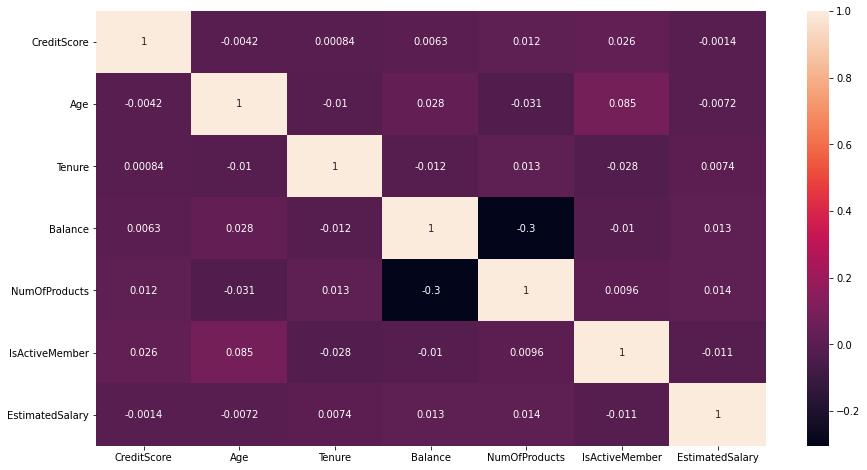

In [29]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
           xticklabels = corr.columns.values, 
           yticklabels = corr.columns.values, annot=True)
corr

#### Exploratory Data Analysis (EDA) 
데이터 분석

Text(0, 0.5, 'Numbers of Customers')

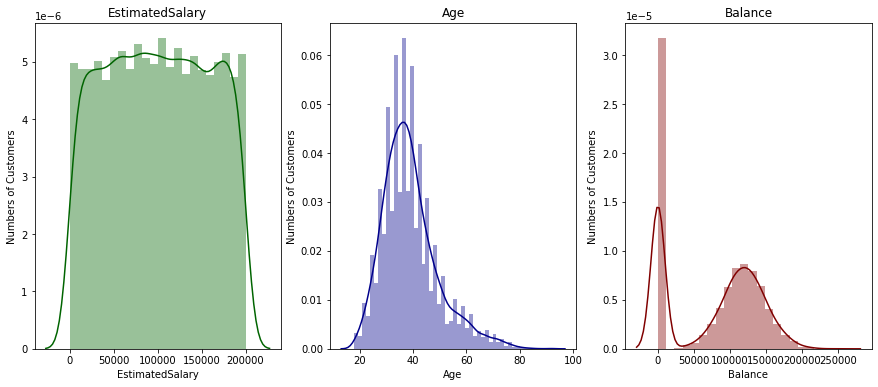

In [30]:
f, axes = plt.subplots(ncols = 3, figsize = (15,6))

sns.distplot(data.EstimatedSalary, kde = True, color='darkgreen', ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('Numbers of Customers')

sns.distplot(data.Age, kde=True, color="darkblue", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('Numbers of Customers')

sns.distplot(data.Balance, kde=True, color="maroon", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('Numbers of Customers')


Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

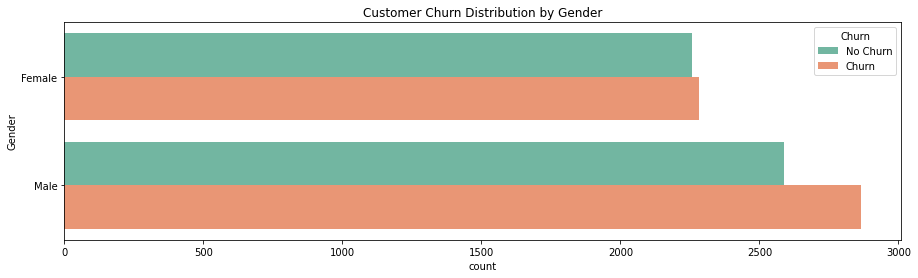

In [31]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

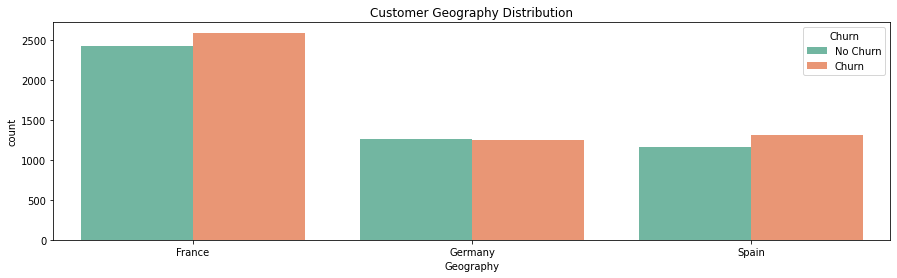

In [32]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

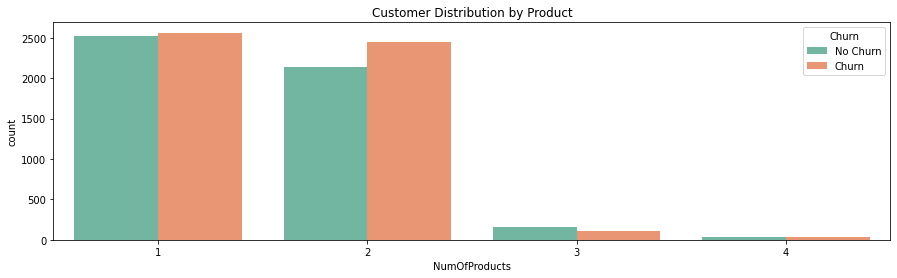

In [33]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='NumOfProducts', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

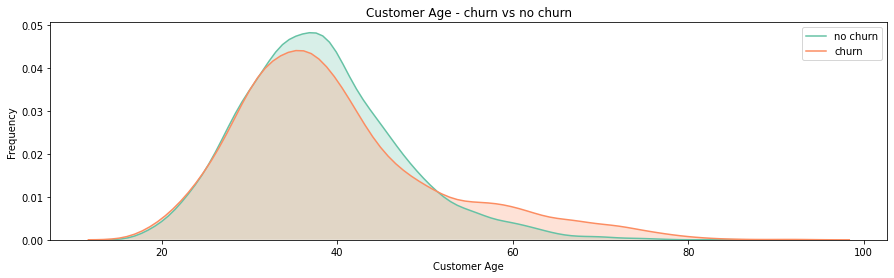

In [34]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

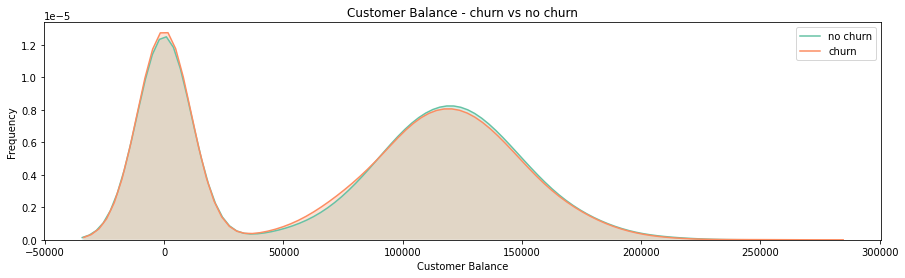

In [35]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

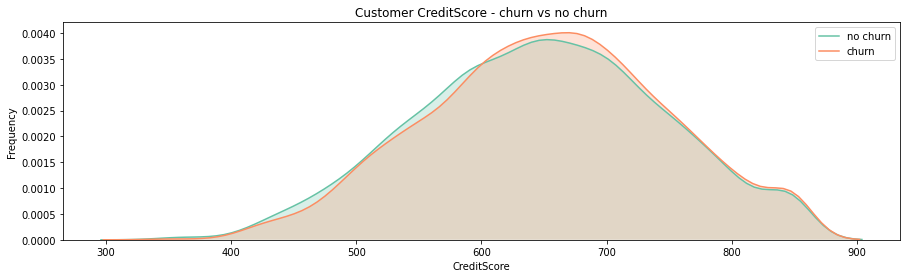

In [36]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')

Text(0.5, 1.0, 'Number of Product VS Balance')

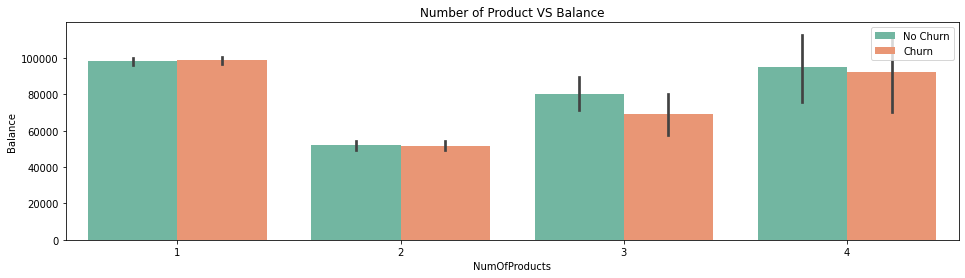

In [37]:
plt.figure(figsize=(16,4))
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn',data=data, palette="Set2")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')

#### Modeling Data

In [38]:
data.dtypes
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes

In [39]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [40]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
importances=forest.feature_importances_
importances

array([3.80365333e-03, 7.53911526e-04, 4.60829701e-04, 1.07251560e-02,
       1.72542353e-03, 2.94920370e-03, 9.88165418e-04, 3.64174549e-04,
       9.74169424e-01, 4.06005864e-03])

In [42]:
features = data.drop(['Churn'],axis=1).columns
indices = np.argsort(importances)[::-1]
indices

array([8, 3, 9, 0, 5, 4, 6, 1, 2, 7])

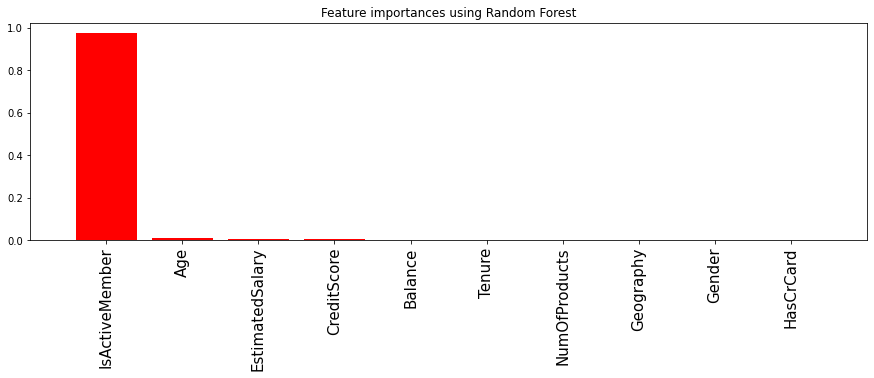

In [43]:
plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [44]:
importances[indices]


array([9.74169424e-01, 1.07251560e-02, 4.06005864e-03, 3.80365333e-03,
       2.94920370e-03, 1.72542353e-03, 9.88165418e-04, 7.53911526e-04,
       4.60829701e-04, 3.64174549e-04])

In [45]:
a=np.array([0,1,2,3,4])
b=np.array([0,4,3,2,1])
c = np.argsort(b)[::1]
a[b]

array([0, 4, 3, 2, 1])

In [46]:
a[::-1]

array([4, 3, 2, 1, 0])

In [47]:
x = [1,2,3,4,5]
x[::-1]

[5, 4, 3, 2, 1]

#### model build

In [53]:
top_features = ['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']
logReg = sm.Logit(y_train, X_train[top_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.689512
         Iterations 4


In [57]:
logistic_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8500
Model:                          Logit   Df Residuals:                     8495
Method:                           MLE   Df Model:                            4
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                0.004593
Time:                        20:42:02   Log-Likelihood:                -5860.9
converged:                       True   LL-Null:                       -5887.9
Covariance Type:            nonrobust   LLR p-value:                 5.055e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0123      0.002      6.538      0.000       0.009       0.016
EstimatedSalary -1.033e-06   3.72e-07     -2.777      0.005   -1.76e-06   -3.04e-07
CreditScore        -0.0003      0.000     -1.912      0.056      -0.001    6.75e-06
Balance         -9.446e-07   3.57e-07     -2.647      0.008   -1.64e-06   -2.45e-07
NumOfProducts      -0.0332      0.037     -0.905      0.366      -0.105       0.039
===================================================================================
"""

In [56]:
logistic_regression.params

Age                1.225097e-02
EstimatedSalary   -1.032544e-06
CreditScore       -2.719705e-04
Balance           -9.445694e-07
NumOfProducts     -3.317942e-02
dtype: float64

In [58]:
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance,NumOfProducts) : 
    return coef[0]*Age+ coef[1]*EstimatedSalary+coef[2]*CreditScore+coef[1]*Balance+coef[2]*NumOfProducts

In [59]:
y1 = y(coef, 50, 100000, 600,100000,2)
p = np.exp(y1) / (1+np.exp(y1))
p

0.5602836861952889

In [61]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top_features], y_train)

In [64]:
clf.predict(X_test[top_features])

array([1, 1, 1, ..., 0, 1, 1])

In [65]:
clf.predict_proba(X_test[top_features])

array([[0.45933714, 0.54066286],
       [0.49999212, 0.50000788],
       [0.46945174, 0.53054826],
       ...,
       [0.5152543 , 0.4847457 ],
       [0.47688466, 0.52311534],
       [0.45636557, 0.54363443]])

In [67]:
clf.score(X_test[top_features], y_test)

0.498

#### iNterpretring Data